## Student Performance Predictor

#### Predicting Exam Scores based on various student factors

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting

df = pd.read_csv("StudentPerformanceFactors.csv")

main_df = df.copy()

## Data Exploration and Preprocessing

In [124]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [125]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Dropping categorical columns (to avoid complexity)

In [127]:
df.drop(['Parental_Involvement' , 'Access_to_Resources' , 'Extracurricular_Activities' , 'Motivation_Level' , 'Internet_Access' , 'Family_Income' , 'Teacher_Quality' , 'School_Type' , 'Peer_Influence' , 'Learning_Disabilities' , 'Parental_Education_Level' , 'Distance_from_Home' , 'Gender' ] , axis=1, inplace=True) 

In [128]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


In [129]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Correlation Matrix

#### Plotting a correlation matrix to see which features are more correlated to Exam_Score

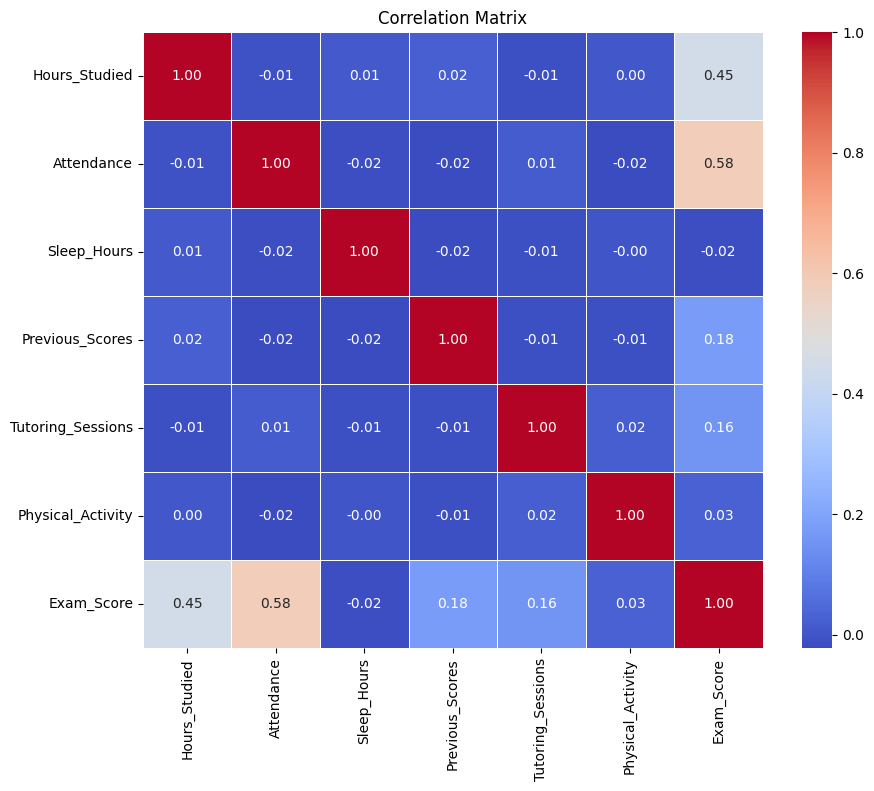

In [130]:
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


#### As seen, the columns Hours_Studied and Attendance have high positive correlation values, that means they have a strong impact on Exam_Score
#### The remaining columns have less or very low correlation value to Exam_Scores, that means they do not have much impact on Exam_Score

#### So, I'm dropping the remaining columns

In [131]:
df.drop(['Sleep_Hours' , 'Previous_Scores' , 'Tutoring_Sessions' , 'Physical_Activity'] , axis=1, inplace=True)
df.head()

,Hours_Studied,Attendance,Exam_Score
0,23,84,67
1,19,64,61
2,24,98,74
3,29,89,71
4,19,92,70


### Scatter Plots

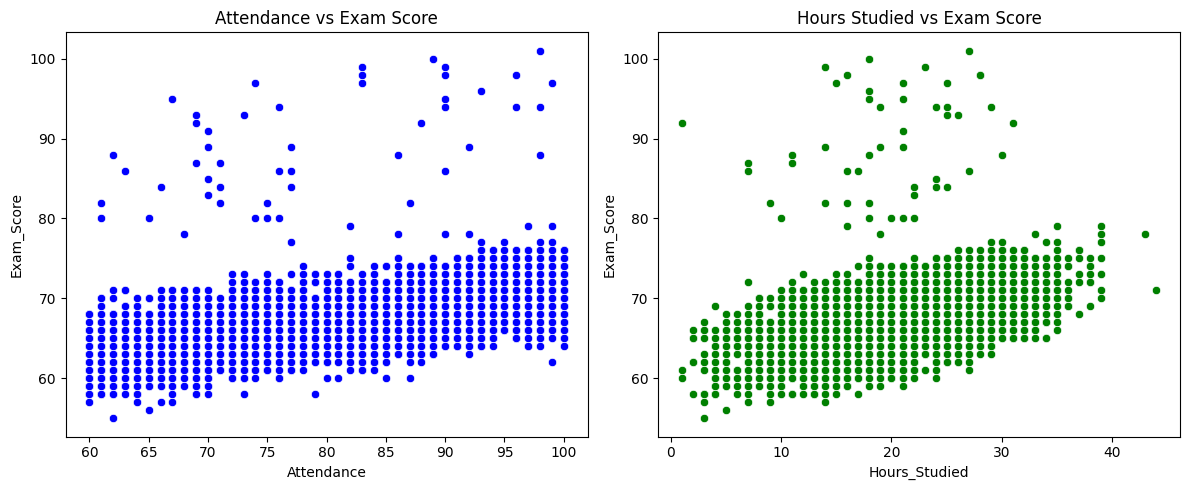

In [132]:
plt.figure(figsize=(12, 5))

# Plot 1: Attendance vs Exam Score

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Attendance', y='Exam_Score', color='blue')
plt.title("Attendance vs Exam Score")

# Plot 2: Hours Studied vs Exam Score

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', color='green')
plt.title("Hours Studied vs Exam Score")

plt.tight_layout()
plt.show()

#### The data is linear in nature

### Regression Plots

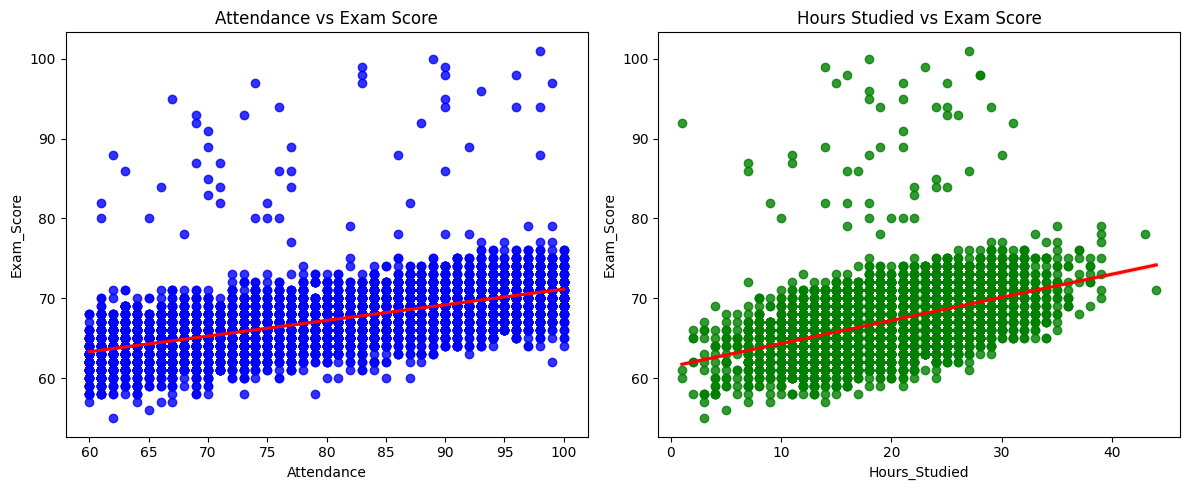

In [133]:
plt.figure(figsize=(12, 5))

# Plot 1: Attendance vs Exam Score with regression line
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='Attendance', y='Exam_Score', scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Attendance vs Exam Score")

# Plot 2: Hours Studied vs Exam Score with regression line
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='Hours_Studied', y='Exam_Score', scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title("Hours Studied vs Exam Score")

plt.tight_layout()
plt.show()

## Building the Model

In [134]:
class Linear_Regression:

    # Initialize parameters
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        # List to store MSE to track loss
        self.mse_history = []
        self.x_mean = None
        self.x_std = None
    
    def fit(self, x, y):
        # Calculate and store mean and standard deviation for normalization
        self.x_mean = x.mean(axis=0)
        self.x_std = x.std(axis=0)
        # Handle cases where std is zero to prevent division by zero
        self.x_std[self.x_std == 0] = 1e-8 # Small epsilon to avoid division by zero
        
        # Normalize training features
        x = (x - self.x_mean)/self.x_std 
        n_samples, n_features = x.shape
        # Initialize weights to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent 
        for i in range(self.epochs):
            # Forward pass (predictions)
            y_pred = np.dot(x, self.weights) + self.bias
    
            # Compute error (residuals)
            error = y_pred - y
    
            # Compute gradients
            dw = (2 / n_samples) * np.dot(x.T, error)
            db = (2 / n_samples) * np.sum(error)
    
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate MSE (Loss)
            self.mse = np.mean(error ** 2)
            self.mse_history.append(self.mse)


    # Plot Loss function (MSE) vs Epochs
    def plot_loss(self):    
        plt.plot(range(self.epochs), self.mse_history, color='blue')
        plt.title("MSE over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Mean Squared Error")
        plt.grid(True)
        plt.show()

    # Make predictions
    def predict(self, new_x):
        new_x = (new_x - self.x_mean)/self.x_std
        return np.dot(new_x, self.weights) + self.bias


# R-squared Calculation
def calculate_r_squared(y_true, y_predicted):

    # Calculates the R-squared (coefficient of determination) score from scratch.
    
    # Calculate the mean of the true values
    y_true_mean = np.mean(y_true)

    # Total Sum of Squares (SST)
    # Measures the total variance in the true values.
    total_sum_of_squares = np.sum((y_true - y_true_mean) ** 2)

    # Sum of Squared Residuals (SSR)
    # Measures the variance that the model *could not* explain (the errors).
    sum_of_squared_residuals = np.sum((y_true - y_predicted) ** 2)

    # Handle cases where SST is zero (e.g., all y_true values are identical)
    # If there's no variance to explain, a perfect model would have SSR = 0 and R^2 = 1.
    if total_sum_of_squares == 0:
        return 1.0 if sum_of_squared_residuals == 0 else 0.0
    
    # R-squared formula
    r_squared = 1 - (sum_of_squared_residuals / total_sum_of_squares)
    return r_squared


# Function for 3D Plotting
def plot_3d_regression_plane(model, x_full_data, x_test_data, y_test_data):
    
    # Generates and displays a 3D scatter plot of actual test data and the regression plane.
    
    print("\nDisplaying 3D Regression Plot...")
    fig = plt.figure(figsize=(10, 8)) # Create a new figure for the plot.
    ax = fig.add_subplot(111, projection='3d') # Add a 3D subplot to the figure.

    # Scatter plot of actual test data points (Feature 1, Feature 2, True Exam Score).
    ax.scatter(x_test_data[:, 0], x_test_data[:, 1], y_test_data, color='red', label='Actual Test Data')

    # Define range for Feature 1 (Hours_Studied) for the regression plane.
    x_feature1_min, x_feature1_max = x_full_data[:, 0].min(), x_full_data[:, 0].max() 
    # Define range for Feature 2 (Attendance) for the regression plane.
    x_feature2_min, x_feature2_max = x_full_data[:, 1].min(), x_full_data[:, 1].max()

    # Create a range of values for Feature 1 for the grid.
    x_feat1_range = np.linspace(x_feature1_min - 1, x_feature1_max + 1, 30)
    # Create a range of values for Feature 2 for the grid, slightly extended for visibility.
    x_feat2_range = np.linspace(x_feature2_min - 5, x_feature2_max + 5, 30)

    # Create a 2D grid from the feature ranges (for plotting the plane).
    X_grid, Y_grid = np.meshgrid(x_feat1_range, x_feat2_range)
    # Flatten and combine grid points into a format suitable for model prediction.
    grid_points = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

    # Predict Z values (Exam_Score) for the grid points using the trained model.
    Z_grid = model.predict(grid_points).reshape(X_grid.shape)

    # Plot the predicted regression plane surface.
    ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, color='blue', label='Regression Plane')

    # Set labels for the x, y, and z axes.
    ax.set_xlabel('Hours_Studied')
    ax.set_ylabel('Attendance')
    ax.set_zlabel('Exam_Score')
    # Set the title of the 3D plot.
    ax.set_title('3D Linear Regression: Exam Score vs. Hours Studied & Attendance')
    plt.legend() # Display the legend for labels.
    plt.show() # Show the 3D plot.

Training model ... 
Model training complete


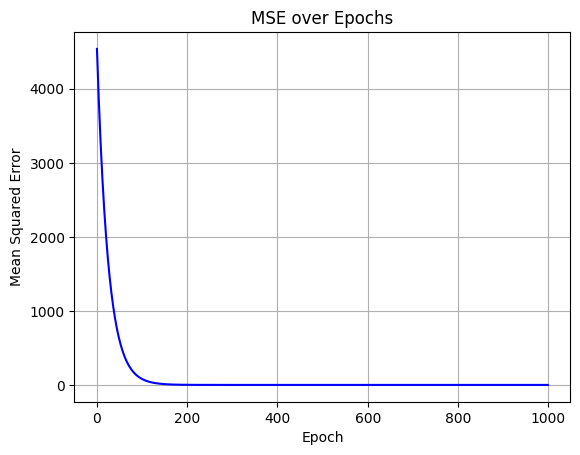


Model Performance Metrics 
Model: Linear Regression
MSE: 6.6098
Train R²: 0.5509
Test R²: 0.5151

Learned weights: [1.74910704 2.28456252]
Learned bias: 67.22885962449476
Predictions for new data: [69.30792401 66.14590226 71.25112936 ... 71.7162693  63.8773314
 70.46062393]

Displaying 3D Regression Plot...


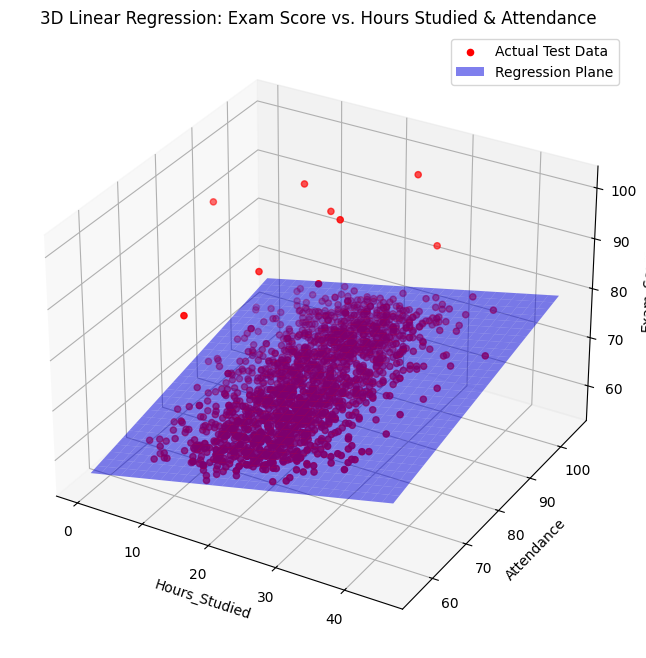

In [135]:
#  Extract features (x) and target (y)
x = df[['Hours_Studied' , 'Attendance']].values
y = df['Exam_Score'].values

# Split the data into training set and testing set (75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)


# Create and train model
#Initiate Linear Regression with specified Learning rate and Iterations
model = Linear_Regression(learning_rate=0.01, epochs=1000)
print("Training model ... ")
# Train the model using training data
model.fit(x_train,y_train)
print("Model training complete")

# Plot MSE history over epochs
model.plot_loss()

# Predict on the training set (R-Squared)
y_train_pred = model.predict(x_train)
train_r2 = calculate_r_squared(y_train, y_train_pred)

# Predict on the test set (R-Squared)
y_test_pred = model.predict(x_test)
test_r2 = calculate_r_squared(y_test, y_test_pred)

# Performance Metrics
print("\nModel Performance Metrics ")
print("Model: Linear Regression")
print(f"MSE: {model.mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


# Learned parameters
print("\nLearned weights:", model.weights)
print("Learned bias:", model.bias)

# Make predictions
predictions = model.predict(x_test)
print("Predictions for new data:", predictions)

#Visualizing prediction (3D Plot)
plot_3d_regression_plane(model, x, x_test, y_test)

In [137]:
# --- User Input Prediction ---
print("\n--- Predict Exam Score for New Input ---")
while True: # Loop indefinitely to allow multiple predictions.
    try:
        # Prompt user for Hours Studied
        hours_studied_input = float(input("Enter Hours Studied (e.g., 7.5): "))
        
        # Prompt user for Attendance
        attendance_input = float(input("Enter Attendance (e.g., 80): "))
        
        # Validate attendance input to be within the data's range.
        if not (0 <= attendance_input <= 100):
            print("Attendance should be between 0 and 100. Please try again.")
            continue # Continue loop if input is invalid.
            
        # Prepare user input as a 2D NumPy array for the predict method.
        user_input_features = np.array([[hours_studied_input, attendance_input]])
        
        # Get the predicted exam score from the model.
        predicted_score = model.predict(user_input_features)
        
        # Display the predicted score with the input values.
        print(f"\nBased on {hours_studied_input:.1f} hours studied and {attendance_input:.0f}% attendance:")
        print(f"Predicted Exam Score: {predicted_score[0]:.2f}") # Access the scalar prediction value.
        
        # Ask if the user wants another prediction.
        another_prediction = input("\nDo you want to predict another score? (y/n): ").lower()
        if another_prediction != 'y': # If input is not 'y', exit the loop.
            break
            
    except ValueError:
        # Handle non-numeric input errors.
        print("Invalid input. Please enter numerical values for hours studied and attendance.")
    except Exception as e:
        # Handle any other unexpected errors.
        print(f"An unexpected error occurred: {e}")

print("\nPrediction session ended. Thank you!")


--- Predict Exam Score for New Input ---


Enter Hours Studied (e.g., 7.5):  30
Enter Attendance (e.g., 80):  80



Based on 30.0 hours studied and 80% attendance:
Predicted Exam Score: 70.15



Do you want to predict another score? (y/n):  n



Prediction session ended. Thank you!
